# **Ejercico 1**

* Crear un nuevo notebook de Colab
* Insertar el código del clasificador:
○ Insertar librerías
○ Leer archivos de ceros y unos (desde drive o github)
○ Insertar el código del clasificador de tal manera que esté organizado como sigue: 
> * normalize_inputs(),
> * split_dataset(), 
> * get_feature_vector(), 
> * choose_classifier()
> * print_classification_results()
* Ejecutar el clasificador de tal manera que al insertar una imagen nueva, imprima la imagen 
y el resultado de la predicción

FullSet :  (2000, 784)
FullLabel:  (2000,)
“Load dataset ... done.
xTrain:  (1600, 784)
xTest:  (400, 784)
yTrain:  (1600,)
yTest:  (400,)


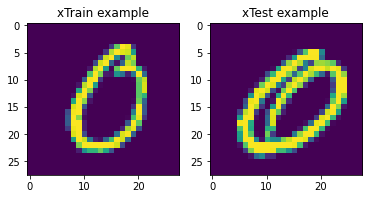

Split dataset ... done
(1600, 8)
Feature Vector: 
 W, w1, w2, w3, H, h1, h2, h3
[[12. 19. 20. ... 21.  8. 22.]
 [15.  7.  8. ...  8. 20. 21.]
 [ 5. 14. 12. ... 14. 10.  7.]
 ...
 [14. 17. 18. ...  9. 22. 21.]
 [11. 20. 10. ...  8. 22.  7.]
 [17.  7.  9. ...  7. 10.  8.]]
Get Feature Vector ... done
Build vectors ... done
Logistic Regression)


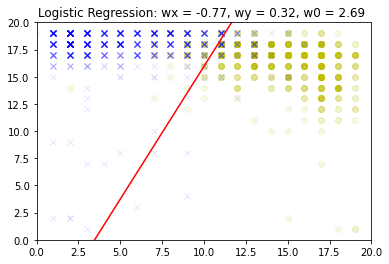

Decision Tree


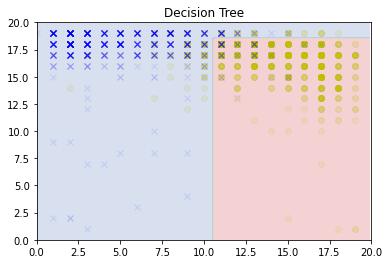

In [6]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

FullSet_0 = np.loadtxt('1000ceros.csv', delimiter=',')
FullSet_1 = np.loadtxt('1000unos.csv', delimiter=',')

FullLabel_0 = np.zeros((FullSet_0.shape[0] ))
FullLabel_1 = np.ones((FullSet_1.shape[0]))


FullSet = np.append(FullSet_0, FullSet_1, axis=0)
FullLabel = np.append(FullLabel_0, FullLabel_1, axis=0)
print("FullSet : ",FullSet.shape)

print("FullLabel: ", FullLabel.shape)

print("“Load dataset ... done.")

xTrain, xTest, yTrain, yTest = train_test_split(FullSet, FullLabel, test_size = 0.2, random_state=0)
print("xTrain: ", xTrain.shape)
print("xTest: ", xTest.shape)
print("yTrain: ",yTrain.shape)
print("yTest: ",yTest.shape)

ax1 = plt.subplot(121)
ax1.imshow(np.reshape(xTrain[0], [28, 28]))
ax1.set_title('xTrain example')

ax1 = plt.subplot(122)
ax1.imshow(np.reshape(xTest[0], [28, 28]))
ax1.set_title('xTest example')
plt.show()

print("Split dataset ... done")

def get_feature_vector(instance, theta):
  feature_vector = []

  #Features in X axis
  sum_x = np.sum(instance, axis=0)
  ind = np.argwhere(sum_x > theta * np.max(sum_x))
  width = ind[-1] - ind[0]
  feature_vector = np.append(feature_vector, width)
  ind_3max_x = np.argsort(sum_x)[-3:]
  feature_vector = np.append(feature_vector, ind_3max_x)

  #Features in Y axis
  sum_y = np.sum(instance, axis = 1)
  ind = np.argwhere(sum_y > theta * np.max(sum_y))
  height = ind[-1] - ind[0]
  feature_vector = np.append(feature_vector, height)
  ind_3max_y = np.argsort(sum_y)[-3:]
  feature_vector = np.append(feature_vector, ind_3max_y)
  return feature_vector

def attributes_to_features(data, theta=0.5):
  Ni, Na = data.shape
  set_features = []
  for ki in range(Ni):
    instance = np.reshape(data[ki],[28, 28])
    feature_vector_i = get_feature_vector(instance, theta=theta)
    set_features.append(feature_vector_i)
  return np.asarray(set_features)

xTrain_feature_vector = attributes_to_features(xTrain, theta=0.5)
xTest_feature_vector = attributes_to_features(xTest, theta=0.5)
print(xTrain_feature_vector.shape)
print("Feature Vector: ")
print(" W, w1, w2, w3, H, h1, h2, h3")
print(xTrain_feature_vector)
print("Get Feature Vector ... done")

def feature_selection(set_features, selX, selY):
  pX = set_features[:, selX]
  pY = set_features[:, selY]
  return pX, pY

### splitted data for each class ####
xTrain_0, xTest_0, yTrain_0, yTest_0 = train_test_split(FullSet_0, FullLabel_0, test_size = 0.2, random_state=0)
xTrain_1, xTest_1, yTrain_1, yTest_1 = train_test_split(FullSet_1, FullLabel_1, test_size = 0.2, random_state=0)

xTrain_0 = xTrain_0/255.0
xTrain_1 = xTrain_1/255.0

xTrainFV_0 = attributes_to_features(xTrain_0)
xTrainFV_1 = attributes_to_features(xTrain_1)

featX_index = 0
featY_index = 4

featX_0, featY_0 = feature_selection(xTrainFV_0, featX_index, featY_index)
featX_1, featY_1 = feature_selection(xTrainFV_1, featX_index, featY_index)

data = np.vstack((featX_0, featY_0)).T
data = np.vstack((data, np.vstack((featX_1, featY_1)).T))
labels = np.array([0]*len(featX_0) + [1]*len(featX_1))
print("Build vectors ... done")


####  
def choose_classifier(option):
  if option==1:
    from sklearn.linear_model import SGDClassifier
    clf = SGDClassifier(shuffle=True, max_iter=1000, tol=1e-3)
  elif option==2:
    from sklearn.svm import SVC
    clf = SVC(kernel='linear')
  elif option==3:
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression()
  elif option==4:
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(max_depth=2, random_state=0)
  else:
    print('choose one classifying method !')
    clf=[]
  return clf

 # --- LEARN with X-validation ----
classifier_option = 3
clf = choose_classifier(classifier_option)
clf.fit(data, labels)
print('Logistic Regression)')
# --- Plot -----
plt.plot(featX_0, featY_0, 'yo', alpha=.1)
plt.plot(featX_1, featY_1, 'bx', alpha=.1)

w = clf.coef_[0]

a = -w[0] / w[1]

xx = np.linspace(0, 20)

yy = a * xx - (clf.intercept_[0] / w[1])
plt.plot(xx,yy,'r')

strTitle = "Logistic Regression: wx = %2.2f, wy = %2.2f, w0 = %2.2f " % (w[0], w[1], clf.intercept_[0])
plt.title(strTitle)
plt.axis([0,20,0,20])

plt.show()

# --- LEARN with X-validation --------
classifier_option = 4

clf = choose_classifier(classifier_option)
clf.fit(data, labels)

print('Decision Tree')

# --- Plot --------------------
plt.plot(featX_0, featY_0, 'yo', alpha=.1)
plt.plot(featX_1, featY_1, 'bx', alpha=.1)

#w = clf.coef_[0]
#a = -w[0] / w[1] 

xx = np.linspace(0, 20)

xx, yy = np.meshgrid(np.arange(0, 20, 0.1), np.arange(0, 20, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#plt.plot(xx,yy,'r')
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.2)
strTitle = "Decision Tree"
plt.title(strTitle)

plt.axis([0,20,0,20])

plt.show()

Testing the classifier

Image index:  329
Prediccion:  0


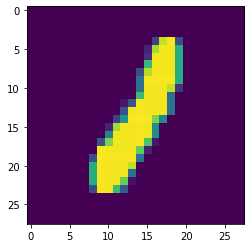

In [15]:
idx = np.random.randint(400)
print('Image index: ', idx)

testSet = np.vstack((xTest_0, xTest_1))

classifier_option = 1
clf = choose_classifier(classifier_option)
clf.fit(data, labels)

label_estimated = clf.predict(data)
print('Prediccion: ', label_estimated[idx])

plt.imshow(testSet[idx,:].reshape((28, 28)))
plt.show()

# **Ejercicio 2**

In [4]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

print(model.summary())

model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 100,738
Trainable params: 100,738
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
Nrows = xTrain.shape[0]
imagenes_xTrain = np.zeros((Nrows, 28, 28))
for i in range(0, Nrows):
  imagenes_xTrain[i,:,:] = xTrain[i].reshape(28, 28)

Nrows = xTest.shape[0]
imagenes_xTest = np.zeros((Nrows, 28, 28))
for i in range(0, Nrows):
  imagenes_xTest[i,:,:] = xTest[i].reshape(28, 28)

nEpochs = 5

model.fit(imagenes_xTrain, yTrain, epochs=nEpochs, verbose=True)

Epoch 1/5
50/50 [==============================] - 1s 3ms/step - loss: 2.0063 - accuracy: 0.9837
Epoch 2/5
50/50 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 0.9994
Epoch 3/5
50/50 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9981
Epoch 4/5
50/50 [==============================] - 0s 2ms/step - loss: 0.1387 - accuracy: 0.9987
Epoch 5/5
50/50 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9994


Predictions:  [1. 0.]


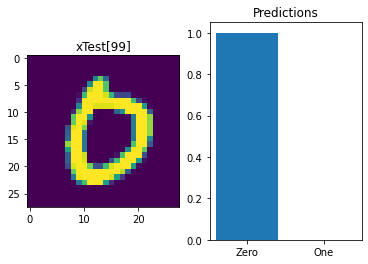

In [17]:
import matplotlib.pyplot as plt

imgIndex = np.random.randint(Nrows)

predictions = model.predict(imagenes_xTest)
myPrediction = np.argmax(predictions[imgIndex])

print("Predictions: ", predictions[imgIndex])
ind = np.arange(1, 3)

ax1 = plt.subplot(121)
ax1.imshow(xTest[imgIndex].reshape(28,28))
strTitle = "xTest[%d]" %(imgIndex)
ax1.set_title(strTitle)

ax2 = plt.subplot(122)
ax2.bar(ind, predictions[imgIndex])
ax2.set_xticks(ind)
ax2.set_xticklabels(['Zero', 'One'])
ax2.set_title("Predictions")
plt.show()